In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
tb = pd.read_excel('CB_fit_results_nopyruvate.xlsx')
tb[tb['Assignment']=='D35Ca-HN']

,Assignment,CA,HN,CB,1/covariance,CB_scott
68,D35Ca-HN,54.006,8.879,36.779254,18.109204,36.786


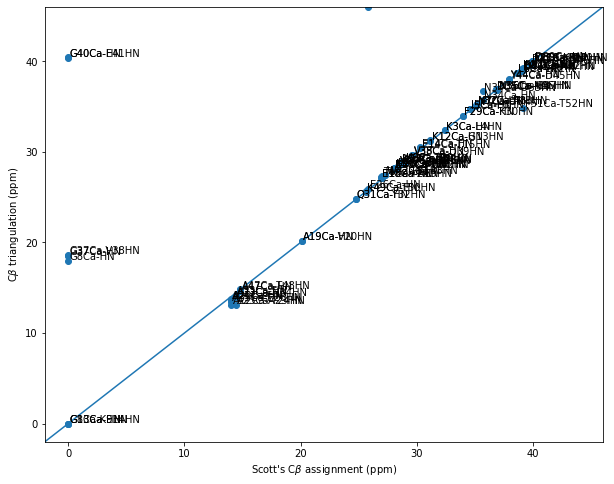

In [12]:
fig, ax = plt.subplots(figsize=[10,8])
result = ax.scatter(tb['CB_scott'], tb['CB'])
plt.plot([-2,46],[-2,46])
plt.xlim([-2,46])
plt.ylim([-2,46])
plt.xlabel("Scott's C$\\beta$ assignment (ppm)")
plt.ylabel("C$\\beta$ triangulation (ppm)")

for i,txt in enumerate(tb['Assignment'].to_numpy()):
    ax.annotate(txt, (tb['CB_scott'][i]+0.1, tb['CB'][i]+0.1))

plt.savefig('CB accuracy_nopyr.png', dpi=300)
plt.show()

In [6]:
tb['is_sequential']=np.append([False], [len(tb['Assignment'][i+1]) > len(tb['Assignment'][i]) for i in range(len(tb)-1)])
CB_not_sequential = tb['CB'][~tb['is_sequential']].to_numpy()
CB_sequential = tb['CB'][tb['is_sequential']].to_numpy()
CB_not_seq = CB_not_sequential[:-1]

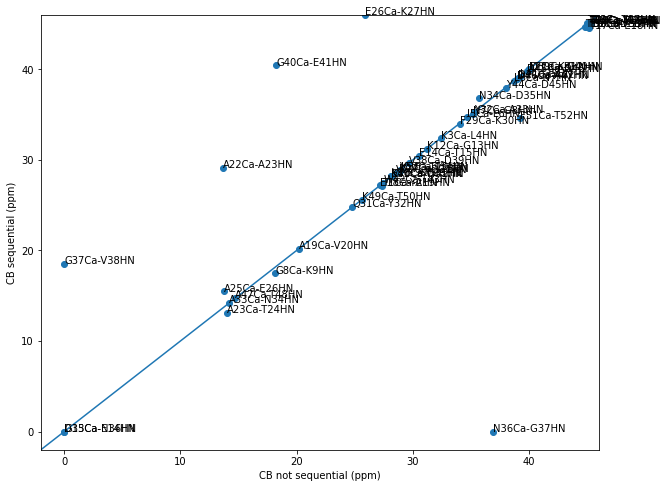

In [9]:
fig, ax = plt.subplots(figsize=[10,8])
result = ax.scatter(CB_not_seq, CB_sequential)
plt.plot([-2,46],[-2,46])
plt.xlim([-2,46])
plt.ylim([-2,46])
plt.xlabel("CB not sequential (ppm)")
plt.ylabel("CB sequential (ppm)")

for i,txt in enumerate(tb['Assignment'][tb['is_sequential']].to_numpy()):
    ax.annotate(txt, (CB_not_seq[i], CB_sequential[i]))

plt.savefig('CB assignment.png', dpi=300)
plt.show()
